In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


# Install libraries

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import spotipy.util as util

from skimage import io
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
df = pd.read_csv('data/SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [6]:
df.duplicated().any().sum()

0

Dropping the features, which we dont find as essential to consider in content-based filtering

In [7]:
df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [8]:
# df= df.drop('track_name', axis=1)
df= df.drop('popularity', axis=1)
df= df.drop('key', axis=1)
df= df.drop('mode', axis=1)
df= df.drop('time_signature', axis=1)
df= df.drop('duration_ms', axis=1)
df= df.drop('artist_name', axis=1)
# df= df.drop('genre', axis=1)

In [9]:
# spotify_data = df
# genre_OHE= pd.get_dummies(spotify_data.genre)

In [10]:
df['genre']

0         Movie
1         Movie
2         Movie
3         Movie
4         Movie
          ...  
232720     Soul
232721     Soul
232722     Soul
232723     Soul
232724     Soul
Name: genre, Length: 232725, dtype: object

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# final['track_id']=df['track_id'].values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   track_name        232725 non-null  object 
 2   track_id          232725 non-null  object 
 3   acousticness      232725 non-null  float64
 4   danceability      232725 non-null  float64
 5   energy            232725 non-null  float64
 6   instrumentalness  232725 non-null  float64
 7   liveness          232725 non-null  float64
 8   loudness          232725 non-null  float64
 9   speechiness       232725 non-null  float64
 10  tempo             232725 non-null  float64
 11  valence           232725 non-null  float64
dtypes: float64(9), object(3)
memory usage: 21.3+ MB


In [14]:
numerical_columns  = []

for i in df.columns:
    if type(df[i][0]) != str:
        numerical_columns.append(i)

In [15]:
numerical_columns

['acousticness',
 'danceability',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence']

In [16]:
df[numerical_columns]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.61100,0.389,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814
1,0.24600,0.590,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816
2,0.95200,0.663,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368
3,0.70300,0.240,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227
4,0.95000,0.331,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390
...,...,...,...,...,...,...,...,...,...
232720,0.00384,0.687,0.714,0.544000,0.0845,-10.626,0.0316,115.542,0.962
232721,0.03290,0.785,0.683,0.000880,0.2370,-6.944,0.0337,113.830,0.969
232722,0.90100,0.517,0.419,0.000000,0.0945,-8.282,0.1480,84.135,0.813
232723,0.26200,0.745,0.704,0.000000,0.3330,-7.137,0.1460,100.031,0.489


In [17]:
def create_features(df, numerical_columns):
    # Create a TfidfVectorizer object
#     tfidf = TfidfVectorizer()
#     tfidf_matrix = tfidf.fit_transform(df['genre'])
#     genre_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names())
#     genre_df.reset_index(drop=True, inplace=True)
    
    numerical_columns = df[numerical_columns].reset_index(drop = True)
    df_numeric = numerical_columns
    scaler= MinMaxScaler()
    scaled_features = scaler.fit_transform(df_numeric)
    df_numeric=pd.DataFrame((scaled_features), columns = numerical_columns.columns)
    
    final = pd.concat([df_numeric], axis=1)
    final['track_id']=df['track_id'].values

    return final

In [18]:
complete_feature_set= create_features(df,numerical_columns)

In [19]:
complete_feature_set.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,track_id
0,0.613454,0.356292,0.910909,0.000000,0.339614,0.900856,0.032070,0.642704,0.814,0BRjO6ga9RKCKjfDqeFgWV
1,0.246988,0.571934,0.737732,0.000000,0.142710,0.834469,0.068374,0.675801,0.816,0BjC1NfoEOOusryehmNudP
2,0.955823,0.650252,0.131113,0.000000,0.094241,0.686429,0.014818,0.325182,0.368,0CoSDzoNIKCRs124s9uTVy
3,0.705823,0.196438,0.326313,0.000000,0.089697,0.716695,0.018311,0.665238,0.227,0Gc6TVm52BwZD07Ki6tIvf
4,0.953815,0.294067,0.225209,0.123123,0.194208,0.557054,0.024767,0.518516,0.390,0IuslXpMROHdEPvSl1fTQK


In [20]:
complete_feature_set.corr()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
acousticness,1.000000,-0.364546,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,-0.364546,1.000000,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
energy,-0.725576,0.325807,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,0.316154,-0.364941,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,0.069004,-0.041684,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,-0.690202,0.438668,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,0.150935,0.134560,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,-0.238247,0.021939,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857
valence,-0.325798,0.547154,0.436771,-0.307522,0.011804,0.399901,0.023842,0.134857,1.000000


In [21]:
# from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
# df['genre']

In [23]:
# df['genre'].isna().sum()

In [24]:
# print(df['genre'].isnull().sum()) # count the number of NaN values
# print(df['genre'].isna().sum())   # count the number of missing values

In [25]:
# df = df.dropna(subset=['genre'])  # drop rows with NaN values in the 'genre' column

# Connecting to Spotify Web API

In [28]:
client_id='2e3991f3876640a993a7599c64474248'
client_secret='237650bcc80b4f5fba005aa6e4f89fea'

In [29]:
#Fetching the playlist
scope = 'user-library-read'
token = util.prompt_for_user_token(
    scope, 
    client_id= client_id, 
    client_secret=client_secret, 
    redirect_uri='http://localhost:8881/callback/'
  )
sp = spotipy.Spotify(auth=token)
playlist_dic = {}
playlist_cover_art = {}

for i in sp.current_user_playlists()['items']:
    playlist_dic[i['name']] = i['uri'].split(':')[2]
    playlist_cover_art[i['uri'].split(':')[2]] = i['images'][0]['url']

print(playlist_dic)


{'night': '7rfNk2tiMuoOqHAaMOMEZT', 'mal': '5RgZhwtLmG9Hc3OKVj2tKO', 'abhi has my other airpod': '6N4CW8OIS7vDJ9L8lcVmUj', 'favs': '0aNyM9fY8n2GhGixuBHTbl'}


In [30]:
def gen_playlists(playlist_name, id_dic, data):
    #generate playlist dataframe
    playlist = pd.DataFrame()
    playlist_name = playlist_name
    
    
    for i, j in enumerate(sp.playlist(id_dic[playlist_name])['tracks']['items']):
        playlist.loc[i, 'artist'] = j['track']['artists'][0]['name']
        playlist.loc[i, 'track_name'] = j['track']['name']
        playlist.loc[i, 'track_id'] = j['track']['id'] # ['uri'].split(':')[2]
        playlist.loc[i, 'url'] = j['track']['album']['images'][1]['url']
        playlist.loc[i, 'date_added'] = j['added_at']

    playlist['date_added'] = pd.to_datetime(playlist['date_added'])  
    
    playlist = playlist[playlist['track_id'].isin(data['track_id'].values)].sort_values('date_added',ascending = False)
    
    return playlist


In [31]:
playlist_df = gen_playlists('favs', playlist_dic, df) 


In [32]:
playlist_df.head()


,artist,track_name,track_id,url,date_added
36,Frank Ocean,Novacane,4osgfFTICMkcGbbigdsa53,https://i.scdn.co/image/ab67616d00001e0259a428...,2022-05-12 02:08:20+00:00
33,Mac Miller,Soulmate,2puHJmjL4jvO19aEA7kzcb,https://i.scdn.co/image/ab67616d00001e022e92f7...,2022-03-27 20:38:18+00:00
32,The Strokes,"Call It Fate, Call It Karma",3Y4rUyw7XBCK6hGHCOt6rp,https://i.scdn.co/image/ab67616d00001e02f07ef1...,2022-03-26 03:38:22+00:00
31,Pink Floyd,Goodbye Blue Sky,0ESdtt9cjGZUkUbaubSrv2,https://i.scdn.co/image/ab67616d00001e025d48e2...,2022-03-26 03:38:19+00:00
30,Pink Floyd,Breathe (In the Air),2ctvdKmETyOzPb2GiJJT53,https://i.scdn.co/image/ab67616d00001e02ea7caa...,2022-03-26 03:38:15+00:00


# Visualize the cover art 

In [33]:
from skimage import io
import math

In [34]:
def visualize_cover(df):
    temp = df['url'].values
    plt.figure(figsize=(15,int(0.625 * len(temp))))
    columns = 5
    
    for i, url in enumerate(temp):
        plt.subplot(math.ceil(len(temp) / columns), columns, i + 1)

        image = io.imread(url)
        plt.imshow(image)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(df['track_name'].values[i], fontsize = 12)
        plt.tight_layout(h_pad=0.4, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)

    plt.show()


In [35]:
playlist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 36 to 0
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   artist      23 non-null     object             
 1   track_name  23 non-null     object             
 2   track_id    23 non-null     object             
 3   url         23 non-null     object             
 4   date_added  23 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 1.1+ KB


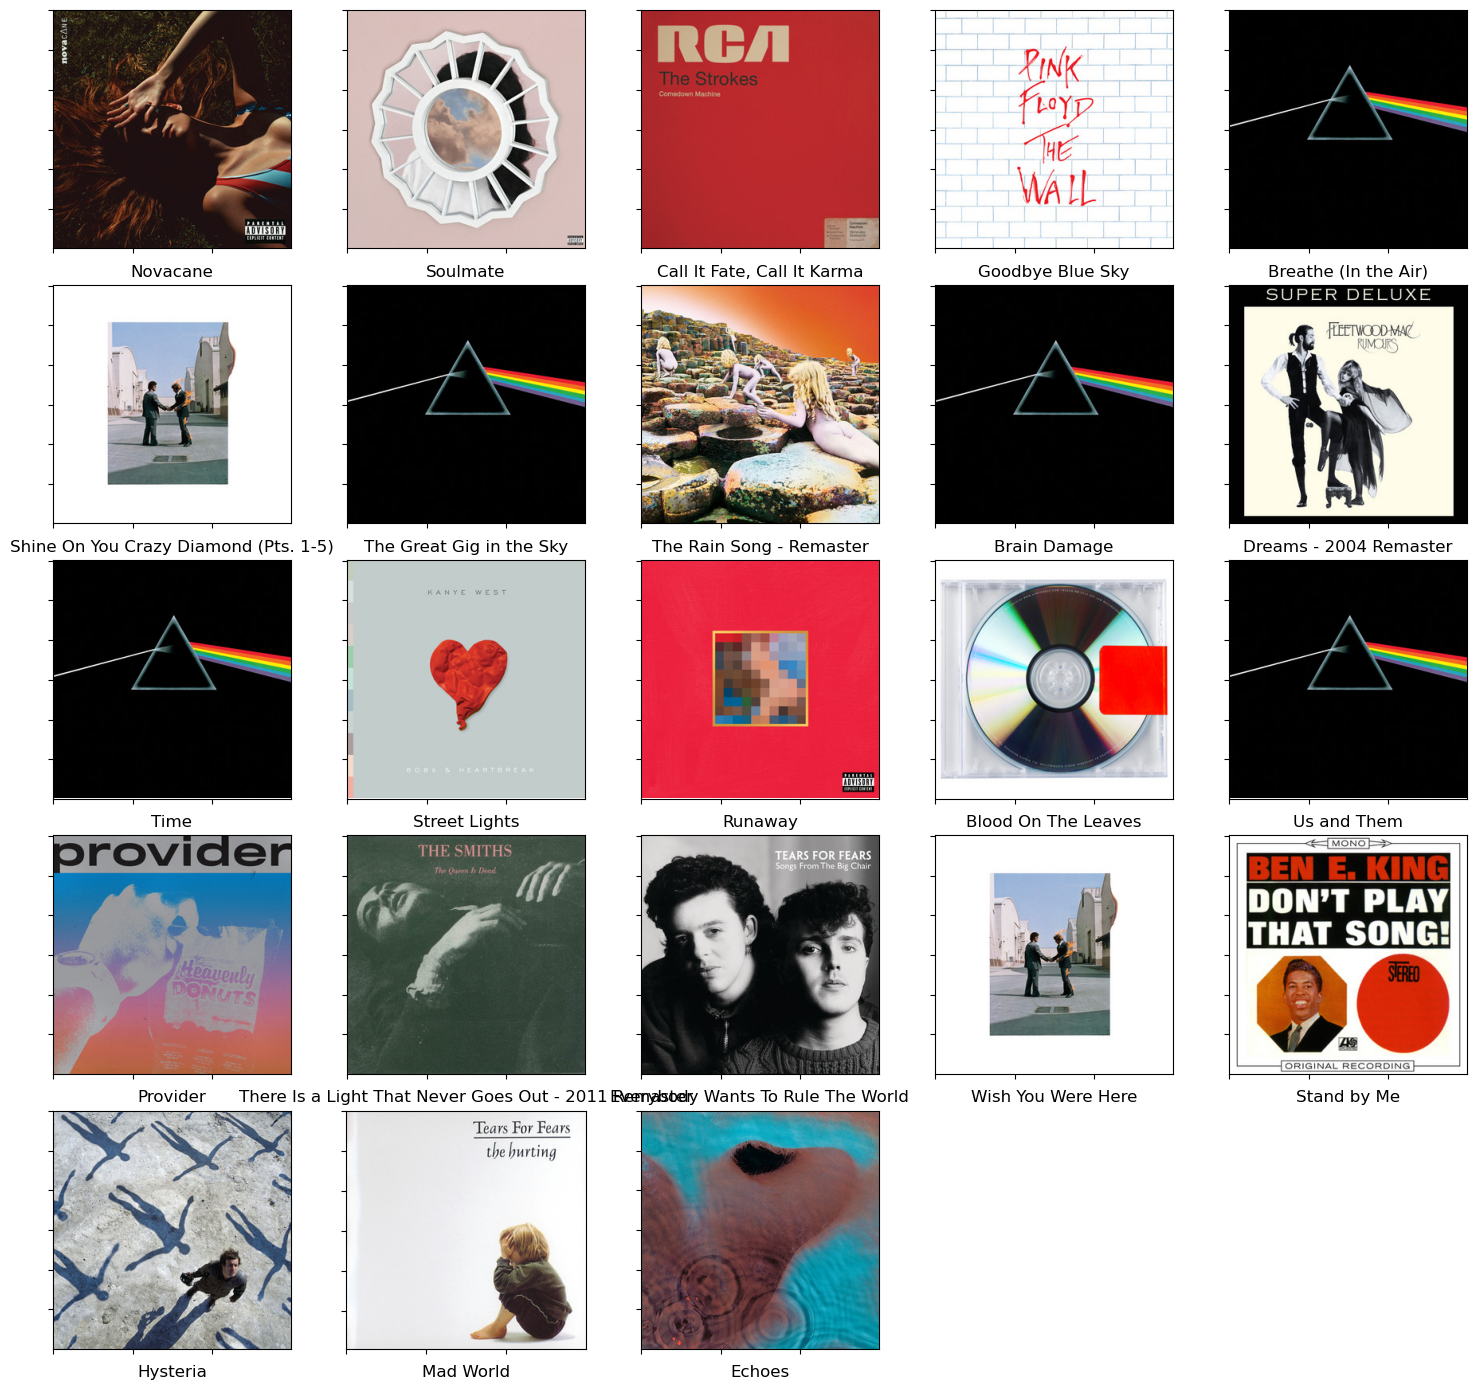

In [36]:
visualize_cover(playlist_df)


In [81]:
playlist_df.head()

,artist,track_name,track_id,url,date_added
36,Frank Ocean,Novacane,4osgfFTICMkcGbbigdsa53,https://i.scdn.co/image/ab67616d00001e0259a428...,2022-05-12 02:08:20+00:00
33,Mac Miller,Soulmate,2puHJmjL4jvO19aEA7kzcb,https://i.scdn.co/image/ab67616d00001e022e92f7...,2022-03-27 20:38:18+00:00
32,The Strokes,"Call It Fate, Call It Karma",3Y4rUyw7XBCK6hGHCOt6rp,https://i.scdn.co/image/ab67616d00001e02f07ef1...,2022-03-26 03:38:22+00:00
31,Pink Floyd,Goodbye Blue Sky,0ESdtt9cjGZUkUbaubSrv2,https://i.scdn.co/image/ab67616d00001e025d48e2...,2022-03-26 03:38:19+00:00
30,Pink Floyd,Breathe (In the Air),2ctvdKmETyOzPb2GiJJT53,https://i.scdn.co/image/ab67616d00001e02ea7caa...,2022-03-26 03:38:15+00:00


# Create Playlist vector

To perform the cosin similarity b/n the playlist and the songs present in the playlist, we have to summarize our playlist in one vector. 
Vector will represent out playlist in feature space, and find songs similar to the songs in our playlist.

In [38]:
def generate_playlist_vector(spotify_features, playlist_df, weight_factor):
    
    spotify_features_playlist = spotify_features[spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    spotify_features_playlist = spotify_features_playlist.merge(playlist_df[['track_id','date_added']], on = 'track_id', how = 'inner')
    
    spotify_features_nonplaylist = spotify_features[~spotify_features['track_id'].isin(playlist_df['track_id'].values)]
    
    playlist_feature_set = spotify_features_playlist.sort_values('date_added',ascending=False)
    
    
    most_recent_date = playlist_feature_set.iloc[0,-1]
    
    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix,'days_from_recent'] = int((most_recent_date.to_pydatetime() - row.iloc[-1].to_pydatetime()).days)
        
    
    playlist_feature_set['weight'] = playlist_feature_set['days_from_recent'].apply(lambda x: weight_factor ** (-x))
    
    playlist_feature_set_weighted = playlist_feature_set.copy()
    
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:,:-3].mul(playlist_feature_set_weighted.weight.astype(int),0))   
    
    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-3]
    

    
    return playlist_feature_set_weighted_final.sum(axis = 0), spotify_features_nonplaylist

In [39]:
playlist_vector, nonplaylist_df = generate_playlist_vector(complete_feature_set, playlist_df, 1.2)
print(playlist_vector.shape)
print(nonplaylist_df.shape)
# complete_feature_set_playlist_vector_EDM, complete_feature_set_nonplaylist_EDM = generate_playlist_feature(complete_feature_set, playlist_EDM, 1.09)


(10,)
(232675, 10)


# Generating Recommendation

In [54]:
def generate_recommendation(spotify_data, playlist_vector, nonplaylist_df):
    non_playlist = spotify_data[spotify_data['track_id'].isin(nonplaylist_df['track_id'].values)]
    non_playlist = non_playlist.copy()
    non_playlist.loc[:, 'sim'] = cosine_similarity(nonplaylist_df.drop(['track_id'], axis = 1).values, playlist_vector.drop(labels = 'track_id').values.reshape(1, -1))[:,0]
    non_playlist_top15 = non_playlist.sort_values('sim',ascending = False).head(15)
    non_playlist_top15['url'] = non_playlist_top15['track_id'].apply(lambda x: sp.track(x)['album']['images'][1]['url'])
    
    return  non_playlist_top15.drop_duplicates(subset=['track_name'])


In [55]:
print(playlist_vector.dtypes)

object


In [56]:
print(nonplaylist_df['track_id'].dtype)
# print(df['track_name'].dtype)
# print(df.dtype)

object


In [57]:
complete_feature_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      232725 non-null  float64
 1   danceability      232725 non-null  float64
 2   energy            232725 non-null  float64
 3   instrumentalness  232725 non-null  float64
 4   liveness          232725 non-null  float64
 5   loudness          232725 non-null  float64
 6   speechiness       232725 non-null  float64
 7   tempo             232725 non-null  float64
 8   valence           232725 non-null  float64
 9   track_id          232725 non-null  object 
dtypes: float64(9), object(1)
memory usage: 17.8+ MB


In [58]:
# top15 = generate_recommendation(spotify_data, playlist_vector, nonplaylist_df)  
# top15.head()
top10 = generate_recommendation(df,playlist_vector,nonplaylist_df)


In [59]:
top10.head(10)


,genre,track_name,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,sim,url
109148,Pop,Gorgeous,1ZY1PqizIl78geGM4xWlEA,0.07130,0.800,0.535,0.000009,0.213,-6.684,0.1350,92.027,0.451,0.998646,https://i.scdn.co/image/ab67616d00001e02da5d5a...
86224,R&B,Stupid Too,03jLGcf6OjpaBhBhDT1xtw,0.00555,0.776,0.543,0.000000,0.155,-8.342,0.0971,93.955,0.400,0.998437,https://i.scdn.co/image/ab67616d00001e027cf00e...
85781,R&B,Super Soaker,1ZjSR7sTVuXg54pbiIn0Q0,0.03700,0.751,0.525,0.000000,0.161,-5.576,0.0788,95.004,0.418,0.998371,https://i.scdn.co/image/ab67616d00001e0202a120...
151696,Pop,Makes Me Wonder,4zwZhQnqJTr1rQ9wRY3nNr,0.07900,0.728,0.487,0.000000,0.204,-7.559,0.1220,99.983,0.371,0.998199,https://i.scdn.co/image/ab67616d00001e021067b9...
95400,Indie,Laugh It Off,6UJUkIobRl4M2EIxOLZVti,0.02490,0.763,0.524,0.000137,0.117,-7.725,0.0759,93.998,0.411,0.998127,https://i.scdn.co/image/ab67616d00001e02f64b68...
26043,Electronic,I Miss You - Remix LP,1E9uIzPJCObTg9AhUvrGFj,0.00905,0.752,0.496,0.000693,0.182,-9.602,0.0573,92.992,0.383,0.997924,https://i.scdn.co/image/ab67616d00001e021abefd...
122281,Rap,Where I Wanna Be,3wQ8RcbLwNRH53FelAVCkX,0.06530,0.838,0.563,0.012800,0.120,-7.105,0.0698,96.886,0.362,0.997815,https://i.scdn.co/image/ab67616d00001e025d0ef8...
108716,Pop,COFFEE BEAN,6vnfObZ4Ys70SBAtti1xZ9,0.08620,0.810,0.582,0.006810,0.207,-5.098,0.1250,95.004,0.503,0.997779,https://i.scdn.co/image/ab67616d00001e02072e9f...
91885,Hip-Hop,Kids,7bVFBtEO81LmuOWDm62tdK,0.03110,0.680,0.468,0.000000,0.207,-11.128,0.0947,84.994,0.348,0.997733,https://i.scdn.co/image/ab67616d00001e026f134f...
159256,Reggaeton,Te Vas,1qaLlCMCCucfi9ZroTXMr5,0.12700,0.831,0.538,0.000000,0.162,-7.897,0.1310,90.041,0.466,0.997715,https://i.scdn.co/image/ab67616d00001e02d48062...


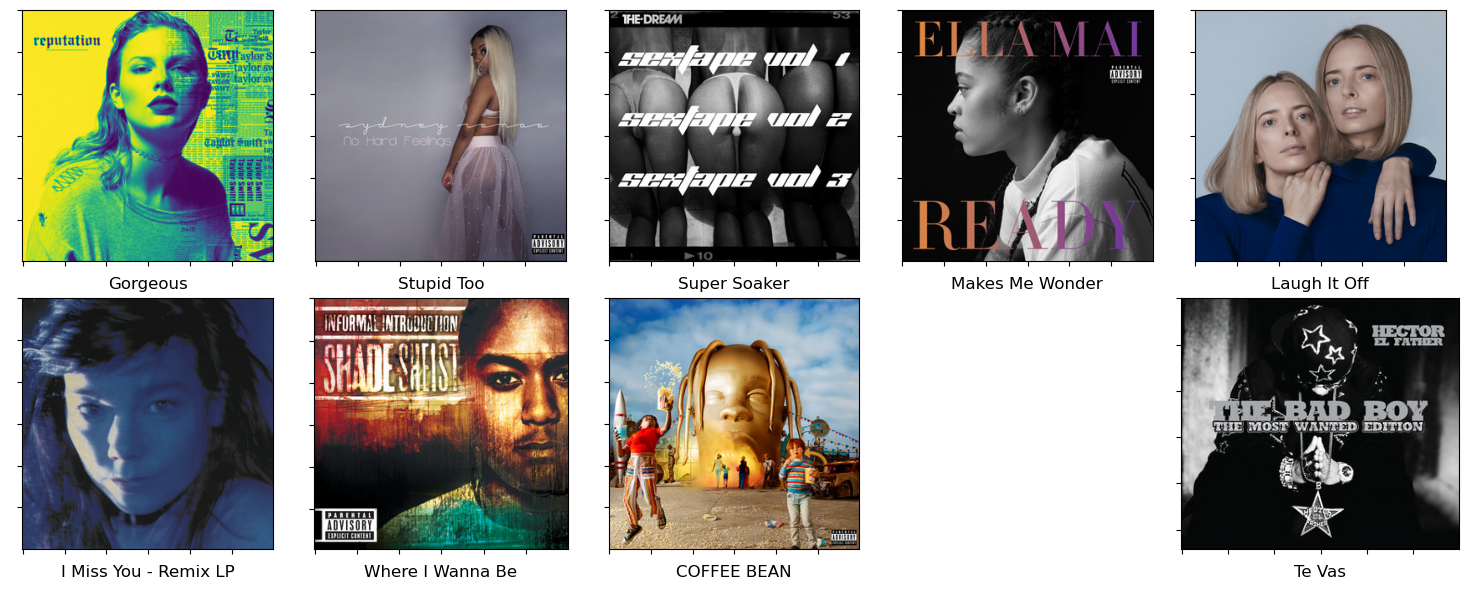

In [60]:
visualize_cover(top10)
# # visualize_cover(top10, top10['track_name'].values)
# visualize_cover(top10.values)


In [73]:
top10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 109148 to 159256
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             10 non-null     object 
 1   track_name        10 non-null     object 
 2   track_id          10 non-null     object 
 3   acousticness      10 non-null     float64
 4   danceability      10 non-null     float64
 5   energy            10 non-null     float64
 6   instrumentalness  10 non-null     float64
 7   liveness          10 non-null     float64
 8   loudness          10 non-null     float64
 9   speechiness       10 non-null     float64
 10  tempo             10 non-null     float64
 11  valence           10 non-null     float64
 12  sim               10 non-null     float64
 13  url               10 non-null     object 
dtypes: float64(10), object(4)
memory usage: 1.2+ KB


In [74]:
playlist_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 36 to 0
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   artist      23 non-null     object             
 1   track_name  23 non-null     object             
 2   track_id    23 non-null     object             
 3   url         23 non-null     object             
 4   date_added  23 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 1.1+ KB
